###  selective search를 이용하여 Object Detection을 위한 Region Proposal 영역을 도출

#### selectivesearch를 설치하고 이미지를 로드

In [1]:
pip install selectivesearch


  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4364 sha256=f95aa17fe2de3b0138968357ff18783b3d386d8b6995248b4c0dbb74cf5feee8
  Stored in directory: c:\users\alswj\appdata\local\pip\cache\wheels\66\4e\88\6de23ce74be839a953498c4ebdfa809ad7da9422ac89ae856c
Successfully built selectivesearch


In [7]:
!pip install opencv-python

  Using cached opencv_python-4.5.2.54-cp38-cp38-win_amd64.whl (34.7 MB)
  Using cached numpy-1.20.3-cp38-cp38-win_amd64.whl (13.7 MB)


In [2]:
import cv2
print()

In [2]:
# !mkdir /content/data
# !wget -O /content/data/audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg

The syntax of the command is incorrect.
'wget' is not recognized as an internal or external command,
operable program or batch file.


img shape: (810, 540, 3)


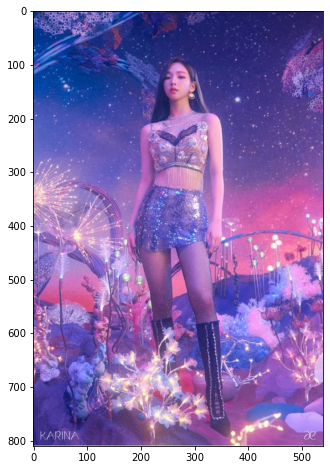

In [1]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

### 오드리헵번 이미지를 cv2로 로드하고 matplotlib으로 시각화 
img = cv2.imread('karina.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [2]:
import selectivesearch 

#selectivesearch.selective_search()는 이미지의 Region Proposal정보를 반환 
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 81


#### 반환된 Region Proposal(후보 영역)에 대한 정보 보기. 
반환된 regions 변수는 리스트 타입으로 세부 원소로 딕셔너리를 가지고 있음. 
개별 딕셔너리내 KEY값별 의미
* rect 키값은 x,y 시작 좌표와 너비, 높이 값을 가지며 이 값이 Detected Object 후보를 나타내는 Bounding box임. 
* size는 Object의 크기
* labels는 해당 rect로 지정된 Bounding Box내에 있는 오브젝트들의 고유 ID
* 아래로 내려갈 수록 너비와 높이 값이 큰 Bounding box이며 하나의 Bounding box에 여러개의 오브젝트가 있을 확률이 커짐. 

In [3]:
regions

[{'rect': (0, 0, 109, 46), 'size': 3899, 'labels': [0.0]},
 {'rect': (78, 0, 461, 490), 'size': 105186, 'labels': [1.0]},
 {'rect': (201, 0, 69, 54), 'size': 2647, 'labels': [2.0]},
 {'rect': (0, 17, 85, 90), 'size': 2687, 'labels': [3.0]},
 {'rect': (458, 31, 81, 95), 'size': 4443, 'labels': [4.0]},
 {'rect': (7, 41, 135, 78), 'size': 4463, 'labels': [5.0]},
 {'rect': (0, 43, 237, 322), 'size': 49045, 'labels': [6.0]},
 {'rect': (222, 96, 114, 171), 'size': 8306, 'labels': [7.0]},
 {'rect': (225, 192, 131, 311), 'size': 14083, 'labels': [8.0]},
 {'rect': (177, 210, 138, 204), 'size': 7613, 'labels': [9.0]},
 {'rect': (265, 215, 59, 100), 'size': 3151, 'labels': [10.0]},
 {'rect': (0, 316, 121, 122), 'size': 9752, 'labels': [11.0]},
 {'rect': (94, 319, 94, 117), 'size': 3485, 'labels': [12.0]},
 {'rect': (227, 327, 81, 99), 'size': 4756, 'labels': [13.0]},
 {'rect': (65, 342, 101, 160), 'size': 8318, 'labels': [14.0]},
 {'rect': (189, 359, 48, 101), 'size': 3013, 'labels': [15.0]},
 {'

In [4]:
# rect정보만 출력해서 보기
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 109, 46), (78, 0, 461, 490), (201, 0, 69, 54), (0, 17, 85, 90), (458, 31, 81, 95), (7, 41, 135, 78), (0, 43, 237, 322), (222, 96, 114, 171), (225, 192, 131, 311), (177, 210, 138, 204), (265, 215, 59, 100), (0, 316, 121, 122), (94, 319, 94, 117), (227, 327, 81, 99), (65, 342, 101, 160), (189, 359, 48, 101), (180, 393, 93, 247), (352, 410, 141, 97), (139, 411, 70, 150), (0, 412, 84, 152), (436, 415, 82, 123), (477, 417, 62, 133), (253, 421, 106, 191), (0, 448, 143, 252), (149, 464, 87, 215), (337, 469, 113, 102), (498, 492, 41, 207), (130, 520, 56, 165), (425, 525, 106, 115), (342, 536, 115, 116), (249, 571, 108, 190), (0, 583, 49, 106), (136, 588, 140, 169), (350, 592, 169, 145), (0, 646, 134, 160), (0, 653, 539, 156), (250, 661, 73, 79), (0, 672, 230, 135), (470, 691, 69, 102), (0, 717, 368, 91), (397, 749, 142, 59), (0, 316, 166, 186), (342, 415, 176, 237), (0, 448, 143, 252), (177, 210, 138, 216), (0, 316, 209, 245), (177, 210, 147, 216), (350, 492, 189, 245), (180, 393, 177,

**bounding box를 시각화 하기**

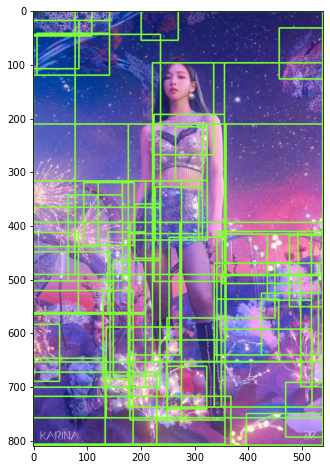

In [5]:
# opencv의 rectangle()을 이용하여 시각화
# rectangle()은 이미지와 좌상단 좌표, 우하단 좌표, box컬러색, 두께등을 인자로 입력하면 원본 이미지에 box를 그려줌. 

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함. 
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

#### bounding box의 크기가 큰 후보만 추출

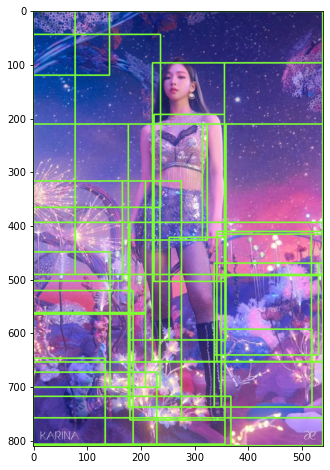

In [6]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함. 
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

### IOU 구하기

#### 입력인자로 후보 박스와 실제 박스를 받아서 IOU를 계산하는 함수 생성

In [19]:
import numpy as np 

def compute_iou(cand_box, gt_box):

    # Calculate intersection areas
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])
    
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    
    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection
    
    iou = intersection / union
    return iou

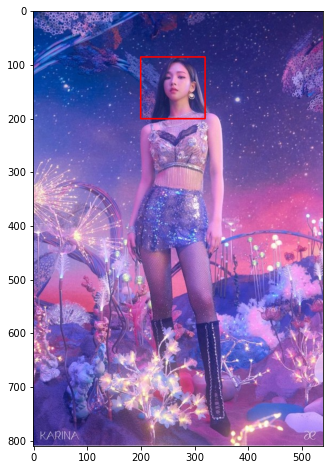

In [25]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 실제 box(Ground Truth)의 좌표를 아래와 같다고 가정. 
gt_box = [200, 85, 320, 200] # 내가 설정해야하는 곳임 ㅇㅅㅇ


img = cv2.imread('karina.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0 , 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [20]:
import selectivesearch

#selectivesearch.selective_search()는 이미지의 Region Proposal정보를 반환 
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 83


In [21]:
cand_rects = [cand['rect'] for cand in regions]
for index, cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    print('index:', index, "iou:", iou)

index: 0 iou: 0.0
index: 1 iou: 0.061091681792022665
index: 2 iou: 0.0
index: 3 iou: 0.0
index: 4 iou: 0.0
index: 5 iou: 0.0
index: 6 iou: 0.13351134846461948
index: 7 iou: 0.9330434782608695
index: 8 iou: 0.9004347826086957
index: 9 iou: 0.019535065442469232
index: 10 iou: 0.0
index: 11 iou: 0.0
index: 12 iou: 0.0
index: 13 iou: 0.0
index: 14 iou: 0.0
index: 15 iou: 0.0
index: 16 iou: 0.0
index: 17 iou: 0.0
index: 18 iou: 0.0
index: 19 iou: 0.0
index: 20 iou: 0.0
index: 21 iou: 0.0
index: 22 iou: 0.0
index: 23 iou: 0.0
index: 24 iou: 0.0
index: 25 iou: 0.0
index: 26 iou: 0.0
index: 27 iou: 0.0
index: 28 iou: 0.0
index: 29 iou: 0.0
index: 30 iou: 0.0
index: 31 iou: 0.0
index: 32 iou: 0.0
index: 33 iou: 0.0
index: 34 iou: 0.0
index: 35 iou: 0.0
index: 36 iou: 0.0
index: 37 iou: 0.0
index: 38 iou: 0.0
index: 39 iou: 0.0
index: 40 iou: 0.0
index: 41 iou: 0.0
index: 42 iou: 0.0
index: 43 iou: 0.0
index: 44 iou: 0.0
index: 45 iou: 0.0
index: 46 iou: 0.0
index: 47 iou: 0.0
index: 48 iou: 0.0

In [15]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 5000]
cand_rects.sort()
cand_rects

[(0, 0, 57, 168),
 (0, 0, 320, 199),
 (0, 0, 320, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 15, 171, 434),
 (0, 15, 171, 434),
 (0, 15, 171, 434),
 (0, 15, 171, 434),
 (0, 15, 318, 434),
 (0, 276, 57, 169),
 (15, 0, 305, 79),
 (15, 0, 305, 199),
 (62, 17, 256, 401),
 (63, 0, 311, 449),
 (63, 18, 114, 85),
 (63, 18, 190, 181),
 (63, 165, 254, 228),
 (63, 165, 254, 253),
 (63, 165, 254, 253),
 (63, 165, 311, 284),
 (82, 359, 292, 90),
 (82, 359, 292, 90),
 (136, 53, 117, 146),
 (164, 60, 89, 139),
 (171, 324, 146, 93),
 (191, 0, 183, 420),
 (191, 0, 183, 420),
 (191, 18, 126, 209),
 (191, 18, 126, 209),
 (202, 0, 172, 420),
 (202, 0, 172, 420),
 (323, 23, 51, 308)]

img shape: (810, 540, 3)
index: 5 iou: 0.9330434782608695 rectangle: (202, 87, 318, 198)
index: 6 iou: 0.9004347826086957 rectangle: (203, 88, 317, 197)
index: 67 iou: 0.9330434782608695 rectangle: (202, 87, 318, 198)


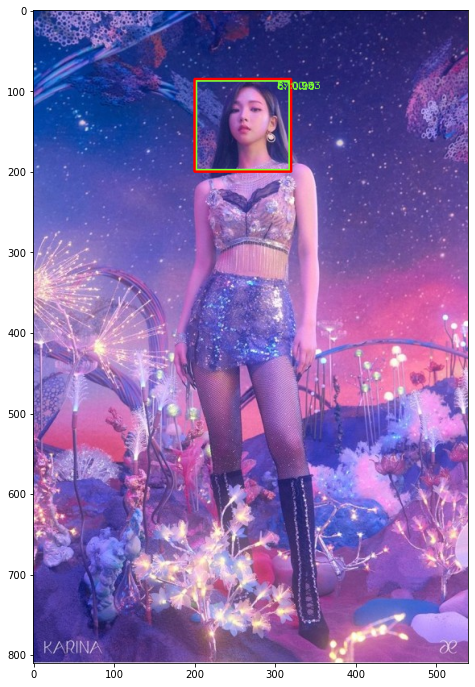

In [26]:
img = cv2.imread('karina.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

green_rgb = (125, 255, 51)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 3000]
gt_box = [200, 85, 320, 200] # 내가 설정해야할곳 -> 지도학습인가봄 ㅇㅅㅇ
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

for index, cand_box in enumerate(cand_rects):
    
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    
    if iou > 0.5:
        print('index:', index, "iou:", iou, 'rectangle:',(cand_box[0], cand_box[1], cand_box[2], cand_box[3]) )
        cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_rgb, thickness=1)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)
    
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()
    